# Drag Race Philippines Sentiment Analysis

##### *GROUP 7*
Gozon, Jean Pauline <br>
Jamias, Gillian Nicole <br>
Reyes, Anton Gabriel

# Importing Libraries and Datasets

In [25]:
#Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import spacy
from wordcloud import WordCloud, STOPWORDS

sns.set_theme(style='darkgrid')

%matplotlib inline


In [51]:
# nltk
#!pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mos\AppData\Roaming\nltk_data...


True

In [27]:
PPN = pd.read_csv('PPN_cleaned.csv')

MS = pd.read_csv('MS_cleaned.csv')

# Data Mining Methodology

## Pre-Processing

### General Pre-Processing

#### Dropping the original `hashtags` column.

In [28]:
PPN = PPN.drop(PPN.columns[[0, 4]], axis=1)
MS = MS.drop(MS.columns[[0, 4]], axis=1)

#### Removing unnecessary character sequences in the `text` column.

Done by using Regex to further clean the `text` column from media links, hashtags, usernames, and "RT"s.

In [29]:
def remove_usernames_links(tweet):
    tweet = re.sub('RT', '', tweet) #RT
    tweet = re.sub('@[^\s]+', '', tweet) #usernames
    tweet = re.sub('http[^\s]+','',tweet) #media links
    return tweet

def remove_hashtags(tweet):
    tweet = re.sub('#[^ ]+', '', tweet) #hashtags
    return tweet


In [30]:
#Using the first function
PPN['text'] = PPN['text'].apply(remove_usernames_links)
MS['text'] = MS['text'].apply(remove_usernames_links)

In [31]:
PPN.head(3)

,user_name,date,text,Date,Time
0,Jec Torres,2022-10-16 15:22:53+00:00,If you just believe in your wildest dreams the...,2022-10-16,15:22:53
1,Abby | Precious Canada ❤️,2022-10-16 08:33:26+00:00,#TeamPreciousPaulaNicole yes excellent drag ...,2022-10-16,08:33:26
2,Jec Torres,2022-10-16 07:59:32+00:00,"Sissy that Walk, Queen 👑❤️ #Baksilog #DragRac...",2022-10-16,07:59:32


In [32]:
MS.head(3)

,user_name,date,text,Date,Time
0,Anj Honne,2022-10-15 18:02:58+00:00,This is playing in my mind rent free. Love ya ...,2022-10-15,18:02:58
1,DaDykewingDuck,2022-10-15 03:15:44+00:00,I'm still #TeamMarinaSummers #TeamMarina,2022-10-15,03:15:44
2,2x5,2022-10-14 13:41:36+00:00,You slaaaaayed all season and you served the ...,2022-10-14,13:41:36


#### Extracting the hashtags from the `text` column

We got the hashtags and put them in their own column.

In [33]:
def find_tags(row_string):
    # use a list comprehension to find list items that start with hashtag
    tags = [x for x in row_string if x.startswith('#')]
    return tags

PPN['split'] = PPN['text'].str.split(' ')
MS['split'] = MS['text'].str.split(' ')

PPN['hashtags'] = PPN['split'].apply(lambda row : find_tags(row))
MS['hashtags'] = MS['split'].apply(lambda row : find_tags(row))

PPN['hashtags'] = PPN['hashtags'].apply(lambda x : str(x).replace('#', '').replace('\\n', ',').replace('\\', '').replace("'", ""))
MS['hashtags'] = MS['hashtags'].apply(lambda x : str(x).replace('#', '').replace('\\n', ',').replace('\\', '').replace("'", ""))

In [34]:
PPN.head(3)

,user_name,date,text,Date,Time,split,hashtags
0,Jec Torres,2022-10-16 15:22:53+00:00,If you just believe in your wildest dreams the...,2022-10-16,15:22:53,"[If, you, just, believe, in, your, wildest, dr...","[Baksilog, DragRacePh, TeamPrecious, TeamPreci..."
1,Abby | Precious Canada ❤️,2022-10-16 08:33:26+00:00,#TeamPreciousPaulaNicole yes excellent drag ...,2022-10-16,08:33:26,"[, , #TeamPreciousPaulaNicole, yes, excellent,...",[TeamPreciousPaulaNicole]
2,Jec Torres,2022-10-16 07:59:32+00:00,"Sissy that Walk, Queen 👑❤️ #Baksilog #DragRac...",2022-10-16,07:59:32,"[Sissy, that, Walk,, Queen, , 👑❤️, #Baksilog, ...","[Baksilog, DragRacePh, TeamPrecious, TeamPreci..."


In [35]:
MS.head(3)

,user_name,date,text,Date,Time,split,hashtags
0,Anj Honne,2022-10-15 18:02:58+00:00,This is playing in my mind rent free. Love ya ...,2022-10-15,18:02:58,"[This, is, playing, in, my, mind, rent, free.,...",[TeamMarinaSummers]
1,DaDykewingDuck,2022-10-15 03:15:44+00:00,I'm still #TeamMarinaSummers #TeamMarina,2022-10-15,03:15:44,"[I'm, still, #TeamMarinaSummers, #TeamMarina]","[TeamMarinaSummers, TeamMarina]"
2,2x5,2022-10-14 13:41:36+00:00,You slaaaaayed all season and you served the ...,2022-10-14,13:41:36,"[, You, slaaaaayed, all, season, and, you, ser...",[teammarinasummers]


#### Removing the hashtags in the `text` column

In [36]:
PPN['text'] = PPN['text'].apply(remove_hashtags)
MS['text'] = MS['text'].apply(remove_hashtags)

### Emoji Sentiment Preparation

#### Column Creation

In [37]:
MS_emo = MS.drop(['user_name', 'Date','date', 'Time','split','hashtags'], axis = 1)
PPN_emo = PPN.drop(['user_name', 'Date', 'date','Time','split','hashtags'], axis = 1)

In [38]:
#PPN Dataset
PPN_emo['positive_emoji'] = 0
PPN_emo['neutral_emoji'] = 0
PPN_emo['negative_emoji'] = 0

#MS Dataset
MS_emo['positive_emoji'] = 0
MS_emo['neutral_emoji'] = 0
MS_emo['negative_emoji'] = 0

#### Emoji Sentiments

In [39]:
positive_emoji = ['💛','💟','💚','❤️','💜','💙','❤','😍','♥️','😊','💕','😂','🙌','🤑','💖','✨','😊','🎉','💞','😝','😃','😁','😎','😘','💓','😉','😄','😀','😜','💗','😌','😆','😛','😻','🙋','❣️','🙂','😇','💝','😏','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']
neutral_emoji = ['🙏','👽','😅','🙃','💩','😳','😑','🙇','🙎','😐','😶','👍','😬']
negative_emoji = ['💥','💘','😭','😱','👎','🙄','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔','😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧','😟','😹','😵','😶','😯','🤒','🤕','😾','💤']

In [40]:
emoji_rx = r"[#*0-9]\uFE0F?\u20E3|©\uFE0F?|[®\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA]\uFE0F?|[\u231A\u231B]|[\u2328\u23CF]\uFE0F?|[\u23E9-\u23EC]|[\u23ED-\u23EF]\uFE0F?|\u23F0|[\u23F1\u23F2]\uFE0F?|\u23F3|[\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB\u25FC]\uFE0F?|[\u25FD\u25FE]|[\u2600-\u2604\u260E\u2611]\uFE0F?|[\u2614\u2615]|\u2618\uFE0F?|\u261D[\uFE0F\U0001F3FB-\U0001F3FF]?|[\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2640\u2642]\uFE0F?|[\u2648-\u2653]|[\u265F\u2660\u2663\u2665\u2666\u2668\u267B\u267E]\uFE0F?|\u267F|\u2692\uFE0F?|\u2693|[\u2694-\u2697\u2699\u269B\u269C\u26A0]\uFE0F?|\u26A1|\u26A7\uFE0F?|[\u26AA\u26AB]|[\u26B0\u26B1]\uFE0F?|[\u26BD\u26BE\u26C4\u26C5]|\u26C8\uFE0F?|\u26CE|[\u26CF\u26D1\u26D3]\uFE0F?|\u26D4|\u26E9\uFE0F?|\u26EA|[\u26F0\u26F1]\uFE0F?|[\u26F2\u26F3]|\u26F4\uFE0F?|\u26F5|[\u26F7\u26F8]\uFE0F?|\u26F9(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\u26FA\u26FD]|\u2702\uFE0F?|\u2705|[\u2708\u2709]\uFE0F?|[\u270A\u270B][\U0001F3FB-\U0001F3FF]?|[\u270C\u270D][\uFE0F\U0001F3FB-\U0001F3FF]?|\u270F\uFE0F?|[\u2712\u2714\u2716\u271D\u2721]\uFE0F?|\u2728|[\u2733\u2734\u2744\u2747]\uFE0F?|[\u274C\u274E\u2753-\u2755\u2757]|\u2763\uFE0F?|\u2764(?:\u200D[\U0001F525\U0001FA79]|\uFE0F(?:\u200D[\U0001F525\U0001FA79])?)?|[\u2795-\u2797]|\u27A1\uFE0F?|[\u27B0\u27BF]|[\u2934\u2935\u2B05-\u2B07]\uFE0F?|[\u2B1B\u2B1C\u2B50\u2B55]|[\u3030\u303D\u3297\u3299]\uFE0F?|[\U0001F004\U0001F0CF]|[\U0001F170\U0001F171\U0001F17E\U0001F17F]\uFE0F?|[\U0001F18E\U0001F191-\U0001F19A]|\U0001F1E6[\U0001F1E8-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F2\U0001F1F4\U0001F1F6-\U0001F1FA\U0001F1FC\U0001F1FD\U0001F1FF]|\U0001F1E7[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EF\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1E8[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1EE\U0001F1F0-\U0001F1F5\U0001F1F7\U0001F1FA-\U0001F1FF]|\U0001F1E9[\U0001F1EA\U0001F1EC\U0001F1EF\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1FF]|\U0001F1EA[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1ED\U0001F1F7-\U0001F1FA]|\U0001F1EB[\U0001F1EE-\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1F7]|\U0001F1EC[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EE\U0001F1F1-\U0001F1F3\U0001F1F5-\U0001F1FA\U0001F1FC\U0001F1FE]|\U0001F1ED[\U0001F1F0\U0001F1F2\U0001F1F3\U0001F1F7\U0001F1F9\U0001F1FA]|\U0001F1EE[\U0001F1E8-\U0001F1EA\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9]|\U0001F1EF[\U0001F1EA\U0001F1F2\U0001F1F4\U0001F1F5]|\U0001F1F0[\U0001F1EA\U0001F1EC-\U0001F1EE\U0001F1F2\U0001F1F3\U0001F1F5\U0001F1F7\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1F1[\U0001F1E6-\U0001F1E8\U0001F1EE\U0001F1F0\U0001F1F7-\U0001F1FB\U0001F1FE]|\U0001F1F2[\U0001F1E6\U0001F1E8-\U0001F1ED\U0001F1F0-\U0001F1FF]|\U0001F1F3[\U0001F1E6\U0001F1E8\U0001F1EA-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F4\U0001F1F5\U0001F1F7\U0001F1FA\U0001F1FF]|\U0001F1F4\U0001F1F2|\U0001F1F5[\U0001F1E6\U0001F1EA-\U0001F1ED\U0001F1F0-\U0001F1F3\U0001F1F7-\U0001F1F9\U0001F1FC\U0001F1FE]|\U0001F1F6\U0001F1E6|\U0001F1F7[\U0001F1EA\U0001F1F4\U0001F1F8\U0001F1FA\U0001F1FC]|\U0001F1F8[\U0001F1E6-\U0001F1EA\U0001F1EC-\U0001F1F4\U0001F1F7-\U0001F1F9\U0001F1FB\U0001F1FD-\U0001F1FF]|\U0001F1F9[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1ED\U0001F1EF-\U0001F1F4\U0001F1F7\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FF]|\U0001F1FA[\U0001F1E6\U0001F1EC\U0001F1F2\U0001F1F3\U0001F1F8\U0001F1FE\U0001F1FF]|\U0001F1FB[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1EE\U0001F1F3\U0001F1FA]|\U0001F1FC[\U0001F1EB\U0001F1F8]|\U0001F1FD\U0001F1F0|\U0001F1FE[\U0001F1EA\U0001F1F9]|\U0001F1FF[\U0001F1E6\U0001F1F2\U0001F1FC]|\U0001F201|\U0001F202\uFE0F?|[\U0001F21A\U0001F22F\U0001F232-\U0001F236]|\U0001F237\uFE0F?|[\U0001F238-\U0001F23A\U0001F250\U0001F251\U0001F300-\U0001F320]|[\U0001F321\U0001F324-\U0001F32C]\uFE0F?|[\U0001F32D-\U0001F335]|\U0001F336\uFE0F?|[\U0001F337-\U0001F37C]|\U0001F37D\uFE0F?|[\U0001F37E-\U0001F384]|\U0001F385[\U0001F3FB-\U0001F3FF]?|[\U0001F386-\U0001F393]|[\U0001F396\U0001F397\U0001F399-\U0001F39B\U0001F39E\U0001F39F]\uFE0F?|[\U0001F3A0-\U0001F3C1]|\U0001F3C2[\U0001F3FB-\U0001F3FF]?|[\U0001F3C3\U0001F3C4](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3C5\U0001F3C6]|\U0001F3C7[\U0001F3FB-\U0001F3FF]?|[\U0001F3C8\U0001F3C9]|\U0001F3CA(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CB\U0001F3CC](?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CD\U0001F3CE]\uFE0F?|[\U0001F3CF-\U0001F3D3]|[\U0001F3D4-\U0001F3DF]\uFE0F?|[\U0001F3E0-\U0001F3F0]|\U0001F3F3(?:\u200D(?:\u26A7\uFE0F?|\U0001F308)|\uFE0F(?:\u200D(?:\u26A7\uFE0F?|\U0001F308))?)?|\U0001F3F4(?:\u200D\u2620\uFE0F?|\U000E0067\U000E0062(?:\U000E0065\U000E006E\U000E0067|\U000E0073\U000E0063\U000E0074|\U000E0077\U000E006C\U000E0073)\U000E007F)?|[\U0001F3F5\U0001F3F7]\uFE0F?|[\U0001F3F8-\U0001F407]|\U0001F408(?:\u200D\u2B1B)?|[\U0001F409-\U0001F414]|\U0001F415(?:\u200D\U0001F9BA)?|[\U0001F416-\U0001F43A]|\U0001F43B(?:\u200D\u2744\uFE0F?)?|[\U0001F43C-\U0001F43E]|\U0001F43F\uFE0F?|\U0001F440|\U0001F441(?:\u200D\U0001F5E8\uFE0F?|\uFE0F(?:\u200D\U0001F5E8\uFE0F?)?)?|[\U0001F442\U0001F443][\U0001F3FB-\U0001F3FF]?|[\U0001F444\U0001F445]|[\U0001F446-\U0001F450][\U0001F3FB-\U0001F3FF]?|[\U0001F451-\U0001F465]|[\U0001F466\U0001F467][\U0001F3FB-\U0001F3FF]?|\U0001F468(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|[\U0001F468\U0001F469]\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F469(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?[\U0001F468\U0001F469]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|\U0001F469\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F46A|[\U0001F46B-\U0001F46D][\U0001F3FB-\U0001F3FF]?|\U0001F46E(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F46F(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F470\U0001F471](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F472[\U0001F3FB-\U0001F3FF]?|\U0001F473(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F474-\U0001F476][\U0001F3FB-\U0001F3FF]?|\U0001F477(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F478[\U0001F3FB-\U0001F3FF]?|[\U0001F479-\U0001F47B]|\U0001F47C[\U0001F3FB-\U0001F3FF]?|[\U0001F47D-\U0001F480]|[\U0001F481\U0001F482](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F483[\U0001F3FB-\U0001F3FF]?|\U0001F484|\U0001F485[\U0001F3FB-\U0001F3FF]?|[\U0001F486\U0001F487](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F488-\U0001F48E]|\U0001F48F[\U0001F3FB-\U0001F3FF]?|\U0001F490|\U0001F491[\U0001F3FB-\U0001F3FF]?|[\U0001F492-\U0001F4A9]|\U0001F4AA[\U0001F3FB-\U0001F3FF]?|[\U0001F4AB-\U0001F4FC]|\U0001F4FD\uFE0F?|[\U0001F4FF-\U0001F53D]|[\U0001F549\U0001F54A]\uFE0F?|[\U0001F54B-\U0001F54E\U0001F550-\U0001F567]|[\U0001F56F\U0001F570\U0001F573]\uFE0F?|\U0001F574[\uFE0F\U0001F3FB-\U0001F3FF]?|\U0001F575(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F576-\U0001F579]\uFE0F?|\U0001F57A[\U0001F3FB-\U0001F3FF]?|[\U0001F587\U0001F58A-\U0001F58D]\uFE0F?|\U0001F590[\uFE0F\U0001F3FB-\U0001F3FF]?|[\U0001F595\U0001F596][\U0001F3FB-\U0001F3FF]?|\U0001F5A4|[\U0001F5A5\U0001F5A8\U0001F5B1\U0001F5B2\U0001F5BC\U0001F5C2-\U0001F5C4\U0001F5D1-\U0001F5D3\U0001F5DC-\U0001F5DE\U0001F5E1\U0001F5E3\U0001F5E8\U0001F5EF\U0001F5F3\U0001F5FA]\uFE0F?|[\U0001F5FB-\U0001F62D]|\U0001F62E(?:\u200D\U0001F4A8)?|[\U0001F62F-\U0001F634]|\U0001F635(?:\u200D\U0001F4AB)?|\U0001F636(?:\u200D\U0001F32B\uFE0F?)?|[\U0001F637-\U0001F644]|[\U0001F645-\U0001F647](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F648-\U0001F64A]|\U0001F64B(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64C[\U0001F3FB-\U0001F3FF]?|[\U0001F64D\U0001F64E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64F[\U0001F3FB-\U0001F3FF]?|[\U0001F680-\U0001F6A2]|\U0001F6A3(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6A4-\U0001F6B3]|[\U0001F6B4-\U0001F6B6](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6B7-\U0001F6BF]|\U0001F6C0[\U0001F3FB-\U0001F3FF]?|[\U0001F6C1-\U0001F6C5]|\U0001F6CB\uFE0F?|\U0001F6CC[\U0001F3FB-\U0001F3FF]?|[\U0001F6CD-\U0001F6CF]\uFE0F?|[\U0001F6D0-\U0001F6D2\U0001F6D5-\U0001F6D7\U0001F6DD-\U0001F6DF]|[\U0001F6E0-\U0001F6E5\U0001F6E9]\uFE0F?|[\U0001F6EB\U0001F6EC]|[\U0001F6F0\U0001F6F3]\uFE0F?|[\U0001F6F4-\U0001F6FC\U0001F7E0-\U0001F7EB\U0001F7F0]|\U0001F90C[\U0001F3FB-\U0001F3FF]?|[\U0001F90D\U0001F90E]|\U0001F90F[\U0001F3FB-\U0001F3FF]?|[\U0001F910-\U0001F917]|[\U0001F918-\U0001F91F][\U0001F3FB-\U0001F3FF]?|[\U0001F920-\U0001F925]|\U0001F926(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F927-\U0001F92F]|[\U0001F930-\U0001F934][\U0001F3FB-\U0001F3FF]?|\U0001F935(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F936[\U0001F3FB-\U0001F3FF]?|[\U0001F937-\U0001F939](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F93A|\U0001F93C(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F93D\U0001F93E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F93F-\U0001F945\U0001F947-\U0001F976]|\U0001F977[\U0001F3FB-\U0001F3FF]?|[\U0001F978-\U0001F9B4]|[\U0001F9B5\U0001F9B6][\U0001F3FB-\U0001F3FF]?|\U0001F9B7|[\U0001F9B8\U0001F9B9](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9BA|\U0001F9BB[\U0001F3FB-\U0001F3FF]?|[\U0001F9BC-\U0001F9CC]|[\U0001F9CD-\U0001F9CF](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D0|\U0001F9D1(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FC-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FE]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|[\U0001F9D2\U0001F9D3][\U0001F3FB-\U0001F3FF]?|\U0001F9D4(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D5[\U0001F3FB-\U0001F3FF]?|[\U0001F9D6-\U0001F9DD](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F9DE\U0001F9DF](?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F9E0-\U0001F9FF\U0001FA70-\U0001FA74\U0001FA78-\U0001FA7C\U0001FA80-\U0001FA86\U0001FA90-\U0001FAAC\U0001FAB0-\U0001FABA\U0001FAC0-\U0001FAC2]|[\U0001FAC3-\U0001FAC5][\U0001F3FB-\U0001F3FF]?|[\U0001FAD0-\U0001FAD9\U0001FAE0-\U0001FAE7]|\U0001FAF0[\U0001F3FB-\U0001F3FF]?|\U0001FAF1(?:\U0001F3FB(?:\u200D\U0001FAF2[\U0001F3FC-\U0001F3FF])?|\U0001F3FC(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FD-\U0001F3FF])?|\U0001F3FD(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF])?|\U0001F3FE(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FD\U0001F3FF])?|\U0001F3FF(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FE])?)?|[\U0001FAF2-\U0001FAF6][\U0001F3FB-\U0001F3FF]?"
extract_emoji = re.compile(emoji_rx)

## Emoji Sentiment Analysis

In [41]:
#PPN
for idx, text in enumerate(PPN_emo['text']):
    tmp = extract_emoji.findall(text)   # generates a list of emoji's present in the post
    
    for emoji in tmp:
        if emoji in positive_emoji:
            PPN_emo.at[idx, 'positive_emoji'] += 1
        elif emoji in negative_emoji:
            PPN_emo.at[idx, 'negative_emoji'] += 1
        else:
            PPN_emo.at[idx, 'neutral_emoji'] += 1

In [42]:
#MS
for idx, text in enumerate(MS_emo['text']):
    tmp = extract_emoji.findall(text)   # generates a list of emoji's present in the post
    
    for emoji in tmp:
        if emoji in positive_emoji:
            MS_emo.at[idx, 'positive_emoji'] += 1
        elif emoji in negative_emoji:
            MS_emo.at[idx, 'negative_emoji'] += 1
        else:
            MS_emo.at[idx, 'neutral_emoji'] += 1

In [43]:
PPN_emo = PPN_emo.drop('text', axis = 1)
MS_emo = MS_emo.drop('text', axis = 1)

In [44]:
PPN_emo.head()

,positive_emoji,neutral_emoji,negative_emoji
0,1,1,0
1,1,0,0
2,1,1,0
3,1,1,0
4,2,1,0


In [45]:
PPN_emo_sum = pd.DataFrame(PPN_emo.sum()).reset_index()
MS_emo_sum = pd.DataFrame(MS_emo.sum()).reset_index()

PPN_emo_sum.columns = ['Sentiment','Sum']
MS_emo_sum.columns = ['Sentiment','Sum']

## Text Sentiment Analysis

### PPN

In [46]:
PPN_SA = PPN.copy()

PPN_SA['text'] = PPN_SA['text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')

PPN_SA['text_token']=PPN_SA['text'].apply(regexp.tokenize)

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)


PPN_SA['text_token'] = PPN_SA['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
PPN_SA['text_string'] = PPN_SA['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

PPN_SA[['text', 'text_token', 'text_string']]

,text,text_token,text_string
0,if you just believe in your wildest dreams the...,"[believe, wildest, dreams, would, come, true]",believe wildest dreams would come true
1,yes excellent drag taste indeed! ♥️,"[yes, excellent, drag, taste, indeed]",yes excellent drag taste indeed
2,"sissy that walk, queen 👑❤️","[sissy, walk, queen]",sissy walk queen
3,sharing the same vibe means you’re in the best...,"[sharing, vibe, means, best, squad, thank, bab...",sharing vibe means best squad thank babies sup...
4,no wonder why you are crowned as drph supersta...,"[wonder, crowned, drph, superstar, queen, touc...",wonder crowned drph superstar queen touch ever...
...,...,...,...
795,lapit na finale omg! pero sana whatever the re...,"[lapit, na, finale, omg, pero, sana, whatever,...",lapit finale omg pero sana whatever result sta...
796,my heart 🥺🥺🥺\n \n \n,[heart],heart
797,divine energy!!!! \n \n \n,"[divine, energy]",divine energy
798,okaaay. changed our wifi pw to,"[okaaay, changed, wifi, pw]",okaaay changed wifi


In [47]:
all_words = ' '.join([word for word in PPN_SA['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

fdist = FreqDist(tokenized_words)

PPN_SA['text_string_fdist'] = PPN_SA['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
PPN_SA[['text', 'text_token', 'text_string', 'text_string_fdist']].tail()

,text,text_token,text_string,text_string_fdist
795,lapit na finale omg! pero sana whatever the re...,"[lapit, na, finale, omg, pero, sana, whatever,...",lapit finale omg pero sana whatever result sta...,lapit na finale omg pero sana whatever result ...
796,my heart 🥺🥺🥺\n \n \n,[heart],heart,heart
797,divine energy!!!! \n \n \n,"[divine, energy]",divine energy,divine energy
798,okaaay. changed our wifi pw to,"[okaaay, changed, wifi, pw]",okaaay changed wifi,okaaay changed wifi
799,finale this wednesday! let's talk about it!! ...,"[finale, wednesday, let, talk, kaninong, team,...",finale wednesday let talk kaninong team kayo,finale wednesday let talk kaninong team kayo


In [48]:

wordnet_lem = WordNetLemmatizer()

PPN_SA['text_string_lem'] = PPN_SA['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
PPN_SA['is_equal']= (PPN_SA['text_string_fdist']==PPN_SA['text_string_lem'])
# show level count
PPN_SA.is_equal.value_counts()

True     787
False     13
Name: is_equal, dtype: int64

In [52]:
analyzer = SentimentIntensityAnalyzer()

PPN_SA['polarity'] = PPN_SA['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

# Change data structure
PPN_SA = pd.concat(
     [PPN_SA.drop(['polarity'], axis=1), 
     PPN_SA['polarity'].apply(pd.Series)], axis=1)

PPN_SA.drop(['user_name','Date','Time','split','hashtags','text_token','text_string','text_string_fdist'], axis = 1)

PPN_SA['sentiment'] = PPN_SA['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

PPN_SA.tail()

,user_name,date,text,Date,Time,split,hashtags,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
795,kakaibabe nina ❤️,2022-10-10 13:16:59+00:00,lapit na finale omg! pero sana whatever the re...,2022-10-10,13:16:59,"[LAPIT, NA, FINALE, OMG!, pero, sana, whatever...",[],"[lapit, na, finale, omg, pero, sana, whatever,...",lapit finale omg pero sana whatever result sta...,lapit na finale omg pero sana whatever result ...,lapit na finale omg pero sana whatever result ...,True,0.0,0.686,0.314,0.7506,positive
796,kakaibabe bless ❤️,2022-10-10 13:06:58+00:00,my heart 🥺🥺🥺\n \n \n,2022-10-10,13:06:58,"[my, heart, 🥺🥺🥺\n#TeamPrecious\n#TeamPreciousP...",[],[heart],heart,heart,heart,True,0.0,1.000,0.000,0.0000,neutral
797,Fay #TeamPrecious Tan,2022-10-10 12:56:44+00:00,divine energy!!!! \n \n \n,2022-10-10,12:56:44,"[DIVINE, ENERGY!!!!, \n#TeamPrecious\n#Preciou...",[],"[divine, energy]",divine energy,divine energy,divine energy,True,0.0,0.000,1.000,0.6908,positive
798,alyssa,2022-10-10 12:36:09+00:00,okaaay. changed our wifi pw to,2022-10-10,12:36:09,"[okaaay., changed, our, wifi, pw, to, #TeamPre...","[TeamPreciousPaulaNicole, TeamPrecious, Precio...","[okaaay, changed, wifi, pw]",okaaay changed wifi,okaaay changed wifi,okaaay changed wifi,True,0.0,1.000,0.000,0.0000,neutral
799,Christian Rosales Arizala,2022-10-10 12:30:33+00:00,finale this wednesday! let's talk about it!! ...,2022-10-10,12:30:33,"[, FINALE, THIS, WEDNESDAY!, Let's, talk, abou...","[TeamMarinaSummers,,TeamPreciousPaulaNicole,Te...","[finale, wednesday, let, talk, kaninong, team,...",finale wednesday let talk kaninong team kayo,finale wednesday let talk kaninong team kayo,finale wednesday let talk kaninong team kayo,True,0.0,1.000,0.000,0.0000,neutral


In [53]:
PPN_SA['sentiment'].value_counts()

positive    451
neutral     299
negative     50
Name: sentiment, dtype: int64

(0.0, 500.0)

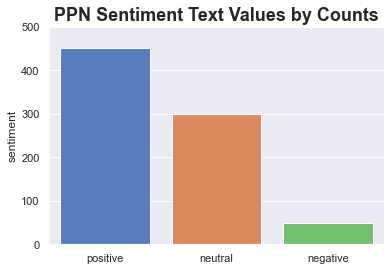

In [54]:
sns.set_palette('muted')
ax = sns.barplot(x=PPN_SA['sentiment'].value_counts().index, y=PPN_SA['sentiment'].value_counts())
ax.set_title('PPN Sentiment Text Values by Counts', fontsize=18, fontweight='bold')
ax.set_ylim(0,500)

### MS

In [55]:
MS_SA = MS.copy()

MS_SA['text'] = MS_SA['text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')

MS_SA['text_token']=MS_SA['text'].apply(regexp.tokenize)

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

MS_SA['text_token'] = MS_SA['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
MS_SA['text_string'] = MS_SA['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

MS_SA[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,this is playing in my mind rent free. love ya ...,"[playing, mind, rent, free, love, ya]",playing mind rent free love
1,i'm still,[still],still
2,you slaaaaayed all season and you served the ...,"[slaaaaayed, season, served, kids, daaaaaaays,...",slaaaaayed season served kids daaaaaaays final...
3,"yep, that’s our queen! 💛☀️\n","[yep, queen]",yep queen
4,marina summers supremacy✨,"[marina, summers, supremacy]",marina summers supremacy


In [56]:
all_words = ' '.join([word for word in MS_SA['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

fdist = FreqDist(tokenized_words)

MS_SA['text_string_fdist'] = MS_SA['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
MS_SA[['text', 'text_token', 'text_string', 'text_string_fdist']].tail()

,text,text_token,text_string,text_string_fdist
611,for the win baby!!!!! ❤️❤️❤️,"[win, baby]",win baby,win baby
612,for the 💜💜,[],,
613,i made an artwork because deserves one! you g...,"[made, artwork, deserves, one, go, filipino, w...",made artwork deserves one filipino winnah,made artwork deserves one filipino winnah
614,may finale viewing party ba sa eastwood or cub...,"[may, finale, viewing, party, ba, sa, eastwood...",may finale viewing party eastwood cubao area,may finale viewing party eastwood cubao area
615,i’m still full of emotions about what happened...,"[still, full, emotions, happened, looking, for...",still full emotions happened looking forward t...,still full emotions happened looking forward t...


In [57]:

wordnet_lem = WordNetLemmatizer()

MS_SA['text_string_lem'] = MS_SA['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
MS_SA['is_equal']= (MS_SA['text_string_fdist']==MS_SA['text_string_lem'])
# show level count
MS_SA.is_equal.value_counts()

True     605
False     11
Name: is_equal, dtype: int64

In [58]:
analyzer = SentimentIntensityAnalyzer()

MS_SA['polarity'] = MS_SA['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

# Change data structure
MS_SA = pd.concat(
     [MS_SA.drop(['polarity'], axis=1), 
     MS_SA['polarity'].apply(pd.Series)], axis=1)

MS_SA.drop(['user_name','Date','Time','split','hashtags','text_token','text_string','text_string_fdist'], axis = 1)

MS_SA['sentiment'] = MS_SA['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

MS_SA.tail()

,user_name,date,text,Date,Time,split,hashtags,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
611,fa-grif-iraf 🌟🦒,2022-10-11 01:40:50+00:00,for the win baby!!!!! ❤️❤️❤️,2022-10-11,01:40:50,"[, , , , #TeamMarina, #TeamMarinaSummers, , FO...","[TeamMarina, TeamMarinaSummers]","[win, baby]",win baby,win baby,win baby,True,0.000,0.208,0.792,0.5859,positive
612,it's.camille,2022-10-11 01:38:03+00:00,for the 💜💜,2022-10-11,01:38:03,"[, #TeamMarinaSummers, for, the, #win, 💜💜]","[TeamMarinaSummers, win]",[],,,,True,0.000,0.000,0.000,0.0000,neutral
613,VanTNT,2022-10-11 00:24:39+00:00,i made an artwork because deserves one! you g...,2022-10-11,00:24:39,"[I, made, an, artwork, because, , deserves, on...",[TeamMarinaSummers],"[made, artwork, deserves, one, go, filipino, w...",made artwork deserves one filipino winnah,made artwork deserves one filipino winnah,made artwork deserves one filipino winnah,True,0.000,1.000,0.000,0.0000,neutral
614,yul | EvaRina Stan 💖,2022-10-10 22:59:26+00:00,may finale viewing party ba sa eastwood or cub...,2022-10-10,22:59:26,"[May, finale, viewing, party, ba, sa, Eastwood...","[DragRacePH, TeamEva, TeamEvaLeQueen, TeamMari...","[may, finale, viewing, party, ba, sa, eastwood...",may finale viewing party eastwood cubao area,may finale viewing party eastwood cubao area,may finale viewing party eastwood cubao area,True,0.000,0.690,0.310,0.4019,positive
615,Transginger,2022-10-10 21:47:42+00:00,i’m still full of emotions about what happened...,2022-10-10,21:47:42,"[I’m, still, full, of, emotions, about, what, ...","[TeamPreciousPaulaNicole, TeamEvaLeQueen, Team...","[still, full, emotions, happened, looking, for...",still full emotions happened looking forward t...,still full emotions happened looking forward t...,still full emotions happened looking forward t...,True,0.119,0.881,0.000,-0.2263,negative


In [59]:
MS_SA['sentiment'].value_counts()

neutral     290
positive    264
negative     62
Name: sentiment, dtype: int64

(0.0, 500.0)

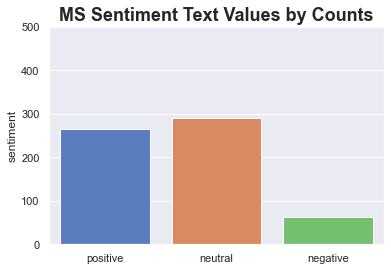

In [60]:
sns.set_palette('muted')
ax = sns.barplot(x=MS_SA['sentiment'].value_counts().index, y=MS_SA['sentiment'].value_counts(), order=('positive', 'neutral', 'negative'))
ax.set_title('MS Sentiment Text Values by Counts', fontsize=18, fontweight='bold')
ax.set_ylim(0,500)

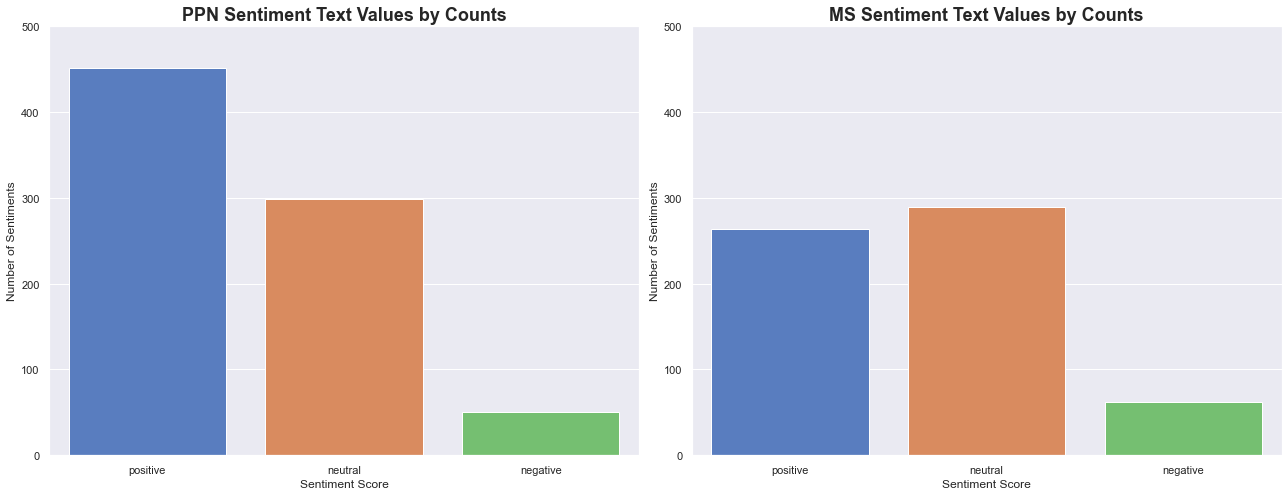

In [61]:
#placing the sentiment charts side by side
fig = plt.figure(figsize=(18, 7))

sns.set_palette('muted')

ax = fig.add_subplot(1, 2, 1)
ax = sns.barplot(x=PPN_SA['sentiment'].value_counts().index, y=PPN_SA['sentiment'].value_counts())
ax.set_title('PPN Sentiment Text Values by Counts', fontsize=18, fontweight='bold')
ax.set_xlabel("Sentiment Score", fontsize=12)
ax.set_ylabel("Number of Sentiments", fontsize=12)
ax.set_ylim(0,500)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x=MS_SA['sentiment'].value_counts().index, y=MS_SA['sentiment'].value_counts(), order=('positive', 'neutral', 'negative'))
ax2.set_title('MS Sentiment Text Values by Counts', fontsize=18, fontweight='bold')
ax2.set_xlabel("Sentiment Score", fontsize=12)
ax2.set_ylabel("Number of Sentiments", fontsize=12)
ax2.set_ylim(0,500)

plt.tight_layout()

# Statistical Inference

## Emoji Sentiments

This part shows how much positive, neutral, and negative emojis are present in the datasets.

In [62]:
PPN_emo_sum

,Sentiment,Sum
0,positive_emoji,449
1,neutral_emoji,386
2,negative_emoji,90


In [63]:
MS_emo_sum

,Sentiment,Sum
0,positive_emoji,199
1,neutral_emoji,367
2,negative_emoji,72


### Emoji Sentiment Analysis

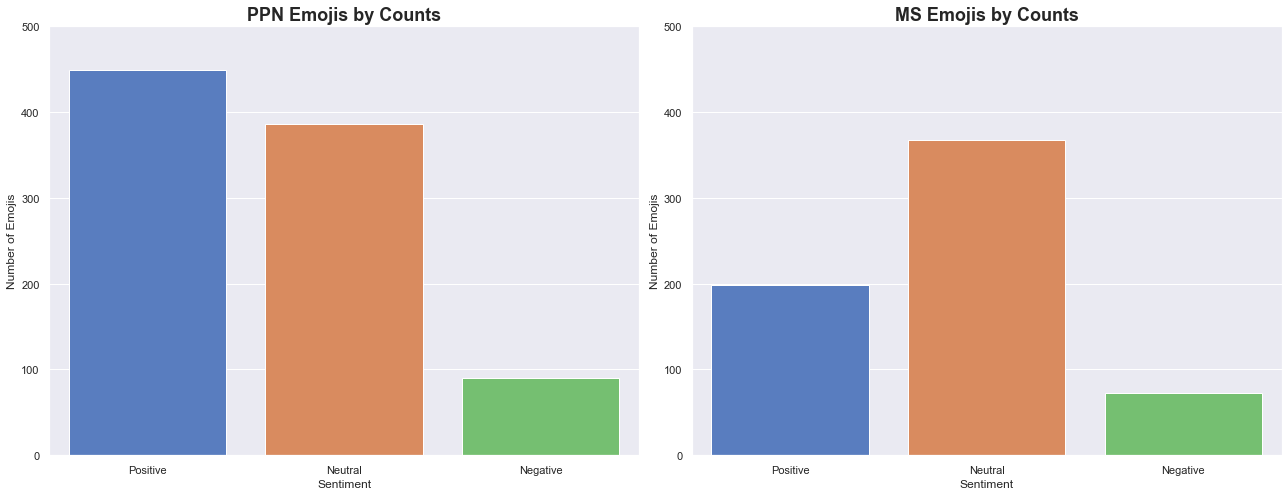

In [64]:
fig = plt.figure(figsize=(18, 7))
new_x = ['Positive', 'Neutral', 'Negative']

sns.set_palette('muted')

ax = fig.add_subplot(1, 2, 1)
ax = sns.barplot(x=PPN_emo_sum['Sentiment'], y=PPN_emo_sum['Sum'])
ax.set_title('PPN Emojis by Counts', fontsize=18, fontweight='bold')
ax.set_xticklabels(new_x)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Number of Emojis", fontsize=12)
ax.set_ylim(0,500)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x=MS_emo_sum['Sentiment'], y=MS_emo_sum['Sum'])
ax2.set_title('MS Emojis by Counts', fontsize=18, fontweight='bold')
ax2.set_xticklabels(new_x)
ax2.set_xlabel("Sentiment", fontsize=12)
ax2.set_ylabel("Number of Emojis", fontsize=12)
ax2.set_ylim(0,500)

plt.tight_layout()

## Text Sentiments

This segment of the notebook shows what is considered to be positive, neutral, or negative according to nltk.

In [65]:
#making a dataframe for the value counts
PPN_count = pd.DataFrame(PPN_SA['sentiment'].value_counts())
PPN_count

,sentiment
positive,451
neutral,299
negative,50


In [66]:
MS_count = pd.DataFrame(MS_SA['sentiment'].value_counts())
MS_count

,sentiment
neutral,290
positive,264
negative,62


### Sentiment Score Analysis

In [67]:
merged = pd.concat([PPN_SA[['compound']], MS_SA[['compound']]], axis=1, keys= ['PPN', 'MS'])

In [68]:
merged.head()

,PPN,MS
,compound,compound
0,0.6705,0.8519
1,0.6705,0.0000
2,0.0000,0.4404
3,0.9413,0.2960
4,0.0000,0.0516


In [69]:
merged.describe()

,PPN,MS
,compound,compound
count,800.000000,616.000000
mean,0.339414,0.207373
std,0.379866,0.375170
min,-0.877900,-0.822500
25%,0.000000,0.000000
50%,0.369300,0.000000
75%,0.636900,0.526700
max,0.972900,0.972900


In [70]:
print(merged.median())

PPN  compound    0.3693
MS   compound    0.0000
dtype: float64


Text(0.5, 1.0, 'Compound Score by Tweets')

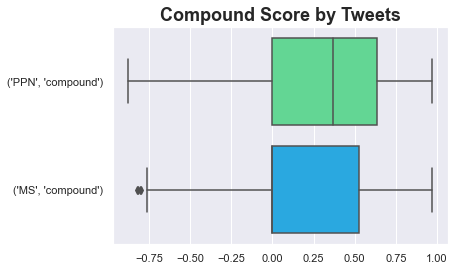

In [71]:
#creating a color array based on line graph
my_colors = ["#50e991", "#0bb4ff"]
# add color array to set_palette
sns.set_palette( my_colors )

ax = sns.boxplot(data=merged,  orient="h", showfliers=True,  meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
ax.set_title('Compound Score by Tweets', fontsize=18, fontweight='bold')

#### Boxplot Analysis

**Median Line**

PPN: 0.3693

MS: 0.00


The median line tells the midpoint or middle value of the dataset. For PPN, the median is at 0.3693, while there is no median line for MS. There is a median for MS, but it coincides with the first quartile. It can be interpreted as half of the tweets for MS are neutral or negative. As for PPN, more than half of the tweets are positive. 

**Q1**

PPN: 0.00

MS: 0.00


The Q1, or the first quartile, separates the lower 25% of the dataset from the rest. For both PPN and MS, the Q1 is at 0.00. This means that 25% of the values are classified as neutral to negative. Hence, there are still more positive tweets for both contestants.

**Q3**

PPN: 0.6369

MS: 0.5267


Quartile 3 separates the top 25% of the tweets on the right. This is equivalent to the 75% mark. For PPN, the Q3 is at 0.6369, while for MS, the Q3 is at 0.5267. This shows that the positive tweets for PPN are more positive compared to MS. 

**Whisker**

PPN: longer left whisker

MS: longer right whisker


The left whisker for PPN is longer, which means that the neutral to negative tweets are more varying than MS, implicating that MS has more consistent neutral to negative tweets. On the other hand, the right whisker is longer for MS, which means that there is a more significant variance in sentiment score at the top 25% of the tweets. Also, this means that the top 25% of the positive tweets for PPN are more consistent, as the right whisker for PPN is shorter than MS.  

**Skewness**

PPN: Left skewed

MS: Left skewed


Both of the generated boxplots for PPN and MS are left skewed. This means that the right whiskers are shorter, which is true for PPN and MS. Having a left-skewed boxplot generally means that most sentiment scores are positive but with a few zero negatives scores. This is justified by the created bar chart that there are more positive tweets for both PPN and MS.

**Outlier:**

PPN: None

MS: 5 outliers


Sentiment scores for MS are more condensed (based on the boxplot) but contain several outliers. There are no outliers on PPN, but the plot is longer or has greater width, which means that the scores are more varied or spread for PPN.

In [72]:
#what are the outliers with a compound score less than -0.75?
MS_SA.sort_values(by= ['compound']).head(6)

,user_name,date,text,Date,Time,split,hashtags,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
545,Religion Is Rina (Rig),2022-10-11 23:33:05+00:00,manifesting na manalo ung baddest bitch in the...,2022-10-11,23:33:05,"[Manifesting, na, manalo, ung, baddest, bitch,...",[TeamMarinaSummers],"[manifesting, na, manalo, ung, baddest, bitch,...",manifesting manalo ung baddest bitch game pop ...,manifesting na manalo ung baddest bitch game p...,manifesting na manalo ung baddest bitch game p...,True,0.521,0.479,0.000,-0.8225,negative
63,khalifa 𓆘,2022-10-12 14:50:44+00:00,all the way from the very premier but damn ms...,2022-10-12,14:50:44,"[#TeamMarinaSummers, all, the, way, from, the,...",[TeamMarinaSummers],"[way, premier, damn, ms, fucking, killed, sire...",way premier damn fucking killed sirena still n...,way premier damn fucking killed sirena still n...,way premier damn fucking killed sirena still n...,True,0.428,0.572,0.000,-0.8173,negative
287,aiman,2022-10-12 11:50:32+00:00,goooooooooooo bad bitch!!!!!!!,2022-10-12,11:50:32,"[GOOOOOOOOOOOO, BAD, BITCH!!!!!!!, #TeamMarina...",[TeamMarinaSummers],"[goooooooooooo, bad, bitch]",goooooooooooo bad bitch,goooooooooooo bad bitch,goooooooooooo bad bitch,True,0.880,0.120,0.000,-0.8074,negative
562,Marina Yumburger,2022-10-11 17:53:41+00:00,"everyone's wig flew, was snatched, made a mind...",2022-10-11,17:53:41,"[Everyone's, wig, flew,, was, snatched,, made,...","[TeamMarinaSummers,]","[everyone, wig, flew, snatched, made, mind, st...",everyone wig flew snatched made mind started a...,everyone wig flew snatched made mind started a...,everyone wig flew snatched made mind started a...,True,0.356,0.644,0.000,-0.8020,negative
199,lovely lady love,2022-10-12 12:17:56+00:00,what happened? you can be mediocre all season ...,2022-10-12,12:17:56,"[What, happened?, You, can, be, mediocre, all,...","[DragRacePh, TeamMarinaSummers, justiceformarina]","[happened, mediocre, season, long, crowned, wi...",happened mediocre season long crowned winner l...,happened mediocre season long crowned winner l...,happened mediocre season long crowned winner l...,True,0.344,0.530,0.126,-0.7650,negative
605,s'aint,2022-10-11 02:15:00+00:00,if they dont let my girl win im gonna get so m...,2022-10-11,02:15:00,"[IF, THEY, DONT, LET, MY, GIRL, WIN, IM, GONNA...",[TeamMarinaSummers],"[dont, let, girl, win, im, gonna, get, mad, as...",dont let girl win gonna get mad asfjwmaudm,dont let girl win get mad asfjwmaudm,dont let girl win get mad asfjwmaudm,True,0.556,0.444,0.000,-0.7409,negative


In [73]:
#what are negative sentiments for PPN?
PPN_SA.sort_values(by= ['compound']).head(6)

,user_name,date,text,Date,Time,split,hashtags,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
276,John Yuri,2022-10-12 12:03:35+00:00,imma crying mess!!! 😭 killed it!!!\n\ncondrag...,2022-10-12,12:03:35,"[imma, crying, mess!!!, 😭, , killed, it!!!\n\n...",[],"[imma, crying, mess, killed, condragulations]",imma crying mess killed condragulations,imma crying mess killed condragulations,imma crying mess killed condragulations,True,0.835,0.165,0.000,-0.8779,negative
676,AC | Precious PANALO NA Nicole 👑💖,2022-10-11 11:36:15+00:00,"here's your first drag superstar, \n\n""my fea...",2022-10-11,11:36:15,"[Here's, your, first, Drag, Superstar,, , \n\n...",[TeamPreciousPaulaNicole],"[first, drag, superstar, fears, behind, gone, ...",first drag superstar fears behind gone shadows...,first drag superstar fears behind gone shadows...,first drag superstar fears behind gone shadows...,True,0.590,0.410,0.000,-0.7351,negative
299,"King | He, him, his",2022-10-12 11:59:46+00:00,oh my god! that was one hell of a lip sync bat...,2022-10-12,11:59:46,"[Oh, my, god!, That, was, one, hell, of, a, li...","[DragRacePHfinale, TeamPreciousPaulaNicole, Te...","[oh, god, one, hell, lip, sync, battle, deserv...",god one hell lip sync battle deserve crown,god one hell lip sync battle deserve crown,god one hell lip sync battle deserve crown,True,0.503,0.350,0.147,-0.7269,negative
246,minnie,2022-10-12 12:13:59+00:00,she’s proof that you can\nwalk through hell an...,2022-10-12,12:13:59,"[she’s, proof, that, you, can\nwalk, through, ...","[TeamPreciousPaulaNicole, TeamPrecious, DragRa...","[proof, walk, hell, still, angel, condragulati...",proof walk hell still angel condragulations,proof walk hell still angel condragulations,proof walk hell still angel condragulations,True,0.479,0.521,0.000,-0.6808,negative
58,Don Brandon Barreto,2022-10-12 15:59:35+00:00,y’all!!! ppn killed that lipsync between marin...,2022-10-12,15:59:35,"[Y’all!!!, PPN, killed, that, lipsync, between...","[TeamPreciousPaulaNicole, BossRodolfo]","[ppn, killed, lipsync, marina, bat, ang, pait,...",ppn killed lipsync marina bat ang pait nyo,ppn killed lipsync marina bat ang pait nyo,ppn killed lipsync marina bat ang pait nyo,True,0.391,0.609,0.000,-0.6705,negative
132,Sabon 🐘,2022-10-12 13:10:30+00:00,playing kill the lights as a celebratory song.,2022-10-12,13:10:30,"[Playing, Kill, the, lights, as, a, celebrator...","[TeamPreciousPaulaNicole, DragRacePHfinale]","[playing, kill, lights, celebratory, song]",playing kill lights celebratory song,playing kill lights celebratory song,playing kill lights celebratory song,True,0.495,0.316,0.189,-0.5994,negative


## Combined Sentiments

In [74]:
columns = ['sentiment', 'positive', 'neutral', 'negative']

In [75]:
PPN_count = PPN_count.T.reset_index()
PPN_count.columns = columns

MS_count = MS_count.T.reset_index()
MS_count.columns = columns

In [76]:
PPN_emoji = PPN_emo_sum.T.reset_index().drop([0])
PPN_emoji.columns = columns
PPN_emoji = PPN_emoji.astype({'positive':'int',
                              'neutral':'int',
                              'negative':'int',})

MS_emoji = MS_emo_sum.T.reset_index().drop([0])
MS_emoji.columns = columns

In [79]:
PPN_add = PPN_count.iloc[0] + PPN_emoji.iloc[0]
MS_add = MS_count.iloc[0] + MS_emoji.iloc[0]

PPN_add = pd.DataFrame(PPN_add).drop('sentiment')
MS_add = pd.DataFrame(MS_add).drop('sentiment')

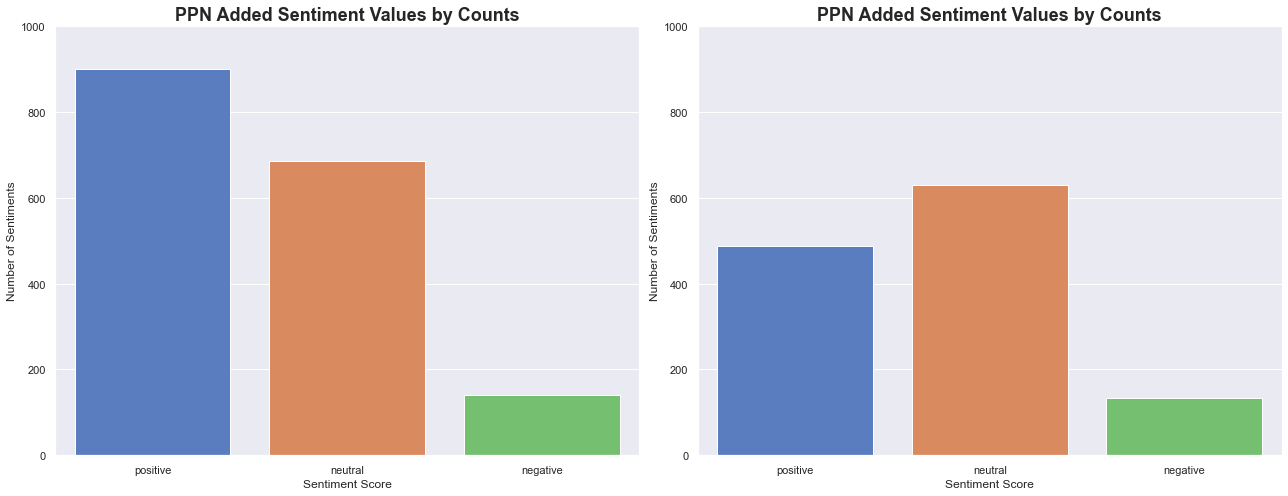

In [80]:
#placing the sentiment charts side by side
fig = plt.figure(figsize=(18, 7))

sns.set_palette('muted')

ax = fig.add_subplot(1, 2, 1)
ax = sns.barplot(x=PPN_add[0].index, y=PPN_add[0])
ax.set_title('PPN Added Sentiment Values by Counts', fontsize=18, fontweight='bold')
ax.set_xlabel("Sentiment Score", fontsize=12)
ax.set_ylabel("Number of Sentiments", fontsize=12)
ax.set_ylim(0,1000)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(x=MS_add[0].index, y=MS_add[0], order=('positive', 'neutral', 'negative'))
ax2.set_title('PPN Added Sentiment Values by Counts', fontsize=18, fontweight='bold')
ax2.set_xlabel("Sentiment Score", fontsize=12)
ax2.set_ylabel("Number of Sentiments", fontsize=12)
ax2.set_ylim(0,1000)

plt.tight_layout()

As seen in the plot above, that even if the text and emoji sentiments would be added up together, PPN would still have a more positive response and MS would be having a neutral response from the fans. 

# Insights and Conclusions

## Conclusion

Based on the visuals we made, there are more positive sentiment text and emojis for Precious Paula Nicole. Marina Summers has mostly neutral sentiment text and emojis. In the box plot created, there are outlier tweets for Marina Summers towards the negative compound score, whilst Precious Paula Nicole has longer whiskers. This suggests that the spectrum or range of emotions evident in tweets related to Precious Paula Nicole is wider as compared to Marina Summers. However, since the left whisker for Marina Summers is shorter than for Precious Paula Nicole, it can also be stated that the tweets for Marina Summers are more consistently neutral to negative than for Precious Paula Nicole. 

## Limitations

As for the limitations, the **sentimentanalyzer** uses tokens and not the relationship of each word to each other, therefore it cannot interpret the actual message of ALL twitter users (i.g. genz terms that may be derogatory are actually uplifting)

Another limit of this project would not be recognizing the sentimental value of Tagalog words and English and gay lingo; Lastly, another limitation would be gathering the value or understanding sarcasm in each Tweet.